In [1]:
import netCDF4
import numpy as np
from scipy.cluster.vq import *
from matplotlib import colors as c
import matplotlib.pyplot as plt
%matplotlib inline

### Open netCDF file tpw_v07r01_200910.nc4.nc and print metadata

In [2]:
f = netCDF4.Dataset("tpw_v07r01_200910.nc4.nc", 'r')
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    title: Monthly mean total precipitable water (total column water vapor) and anomalies on a 1.0 degree grid made from RSS Version-7 microwave radiometer data
    institution: Remote Sensing Systems
    source: Satellite Microwave Radiometer brightness temperatures converted to precipitable water using RSS Version-7 algorithm
    references: More information is available at http://www.remss.com/measurements/atmospheric-water-vapor/tpw-1-deg-product ; See also Wentz, FJ, L Ricciardulli, KA Hilburn and others, 2007, How much more rain will global warming bring?, Science, 317, 233-235, and Wentz, FJ, MC Schabel, 2000, Precise climate monitoring using complementary satellite data sets, Nature, 403, 414-416.
    history: 2012, Carl A Mears, Remote Sensing Systems, data set created from V-7 DISCOVER satellite microwave vapor data
    Metadata_Conventions: CF-1.6, Unidata Dataset Di

### get latitudes, longitudes and precipitable water
- Do not read latitude and longitude data; just get metadata
- Read precipitable water for all latitude and longitude but for time=0

In [3]:
lats = f.variables['latitude']
lons = f.variables['longitude']
pw = f.variables['precipitable_water'][0,:,:]

### Print precipitable water (pw)
- What do you see?
- Why?

In [4]:
print(pw)

[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


- In the previous cell, '--' marks missing values
- As you can see, pw contains lots of missing values!

### Let's close our netCDF file

In [5]:
f.close()

### We can use flatten() to create a long vector from a multi-dimensional array
- Why do we do that?

Because the algorithm we will be using below (K-means from scipy) is meant to be used on vectors only!

In [11]:
flatraster = pw.flatten()

In [12]:
print(pw.shape)
print(flatraster.shape)

(180, 360)
(64800,)


### We use K-means and explore the effect of choosing different numbers of clusters

Calculate k-means with  2  cluster.
Calculate k-means with  3  cluster.
Calculate k-means with  4  cluster.
Calculate k-means with  5  cluster.
Calculate k-means with  6  cluster.
Calculate k-means with  7  cluster.
Calculate k-means with  8  cluster.


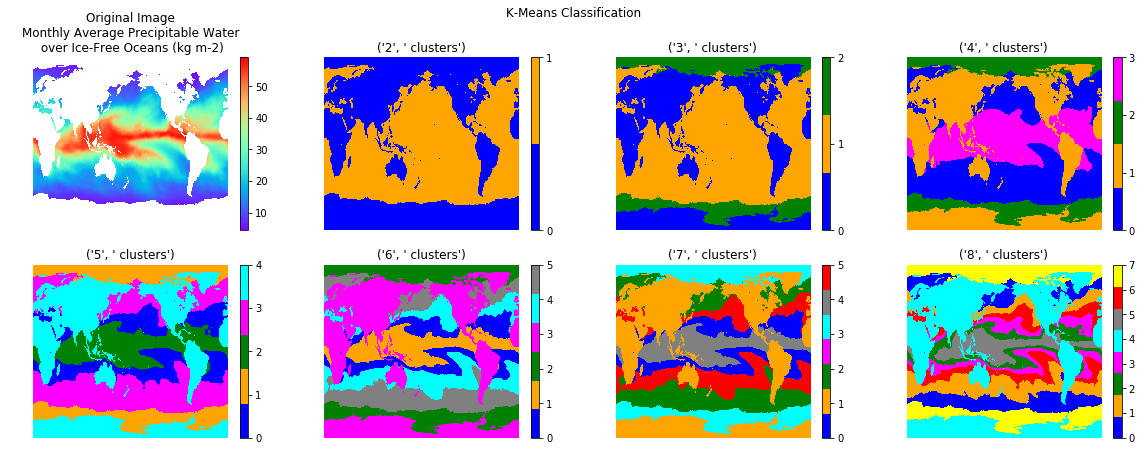

In [13]:
import netCDF4
import numpy as np
from scipy.cluster.vq import *
from matplotlib import colors as c
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize our seed to make sure our run is reproducible i.e. returns the same list of random numbers!
np.random.seed((1000,2000))

f = netCDF4.Dataset('tpw_v07r01_200910.nc4.nc', 'r')
lats = f.variables['latitude']
lons = f.variables['longitude']
pw = f.variables['precipitable_water'][0,:,:]

f.close()
# Flatten image to get line of values
flatraster = pw.flatten()
flatraster.mask = False
flatraster = flatraster.data

# Create figure to receive results
fig = plt.figure(figsize=[20,7])
fig.suptitle('K-Means Classification')

# In first subplot add original image
ax = fig.add_subplot(241)
ax.axis('off')
ax.set_title('Original Image\nMonthly Average Precipitable Water\n over Ice-Free Oceans (kg m-2)')
original=ax.imshow(pw, cmap='rainbow', interpolation='nearest', aspect='auto', origin='lower')
plt.colorbar(original, cmap='rainbow', ax=ax, orientation='vertical')

# In remaining subplots add k-means classified images
# Define colormap
list_colors=['blue','orange', 'green', 'magenta', 'cyan', 'gray', 'red', 'yellow']
for i in range(7):
    print("Calculate k-means with ", i+2, " cluster.")
    
    #This scipy code classifies k-mean, code has same length as flattened
    # raster and defines which class the value corresponds to
    centroids, variance = kmeans(flatraster.astype(float), i+2)
    code, distance = vq(flatraster, centroids)
    
    #Since code contains the classified values, reshape into a 2D array
    codeim = code.reshape(pw.shape[0], pw.shape[1])
    
    #Plot the subplot with (i+2)th k-means
    ax = fig.add_subplot(2,4,i+2)
    ax.axis('off')
    xlabel = str(i+2) , ' clusters'
    ax.set_title(xlabel)
    bounds=range(0,i+2)
    cmap = c.ListedColormap(list_colors[0:i+2])
    kmp=ax.imshow(codeim, interpolation='nearest', aspect='auto', cmap=cmap,  origin='lower')
    plt.colorbar(kmp, cmap=cmap,  ticks=bounds, ax=ax, orientation='vertical')
plt.show()

### Select K-means with 6 clusters and choose to keep one only for further analysis...

Calculate k-means with 6 clusters.


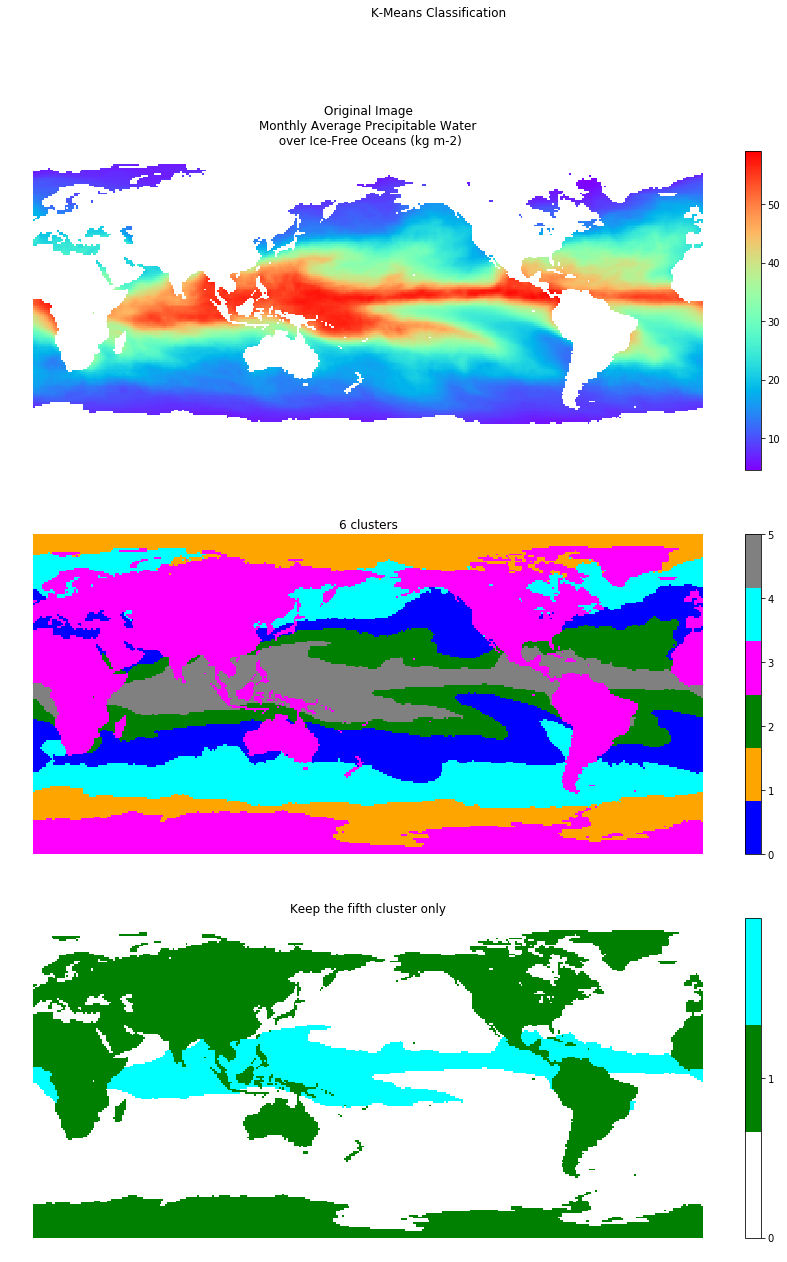

In [9]:
import netCDF4
import numpy as np
from scipy.cluster.vq import *
from matplotlib import colors as c
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed((1000,2000))

f = netCDF4.Dataset('tpw_v07r01_200910.nc4.nc', 'r')
lats = f.variables['latitude']
lons = f.variables['longitude']
pw = f.variables['precipitable_water'][0,:,:]

f.close()
# Flatten image to get line of values
flatraster = pw.flatten()
flatraster.mask = False
flatraster = flatraster.data


# In first subplot add original image
fig, (ax1, ax2, ax3)  = plt.subplots(3, sharex=True)

# Create figure to receive results
fig.set_figheight(20)
fig.set_figwidth(15)

fig.suptitle('K-Means Classification')
ax1.axis('off')
ax1.set_title('Original Image\nMonthly Average Precipitable Water\n over Ice-Free Oceans (kg m-2)')
original=ax1.imshow(pw, cmap='rainbow', interpolation='nearest', aspect='auto', origin='lower')
plt.colorbar(original, cmap='rainbow', ax=ax1, orientation='vertical')
# In remaining subplots add k-means classified images
# Define colormap
list_colors=['blue','orange', 'green', 'magenta', 'cyan', 'gray', 'red', 'yellow']

print("Calculate k-means with 6 clusters.")
    
#This scipy code classifies k-mean, code has same length as flattened
# raster and defines which class the value corresponds to
centroids, variance = kmeans(flatraster.astype(float), 6)
code, distance = vq(flatraster, centroids)
    
#Since code contains the classified values, reshape into SAR dimensions
codeim = code.reshape(pw.shape[0], pw.shape[1])
    
#Plot the subplot with 4th k-means
ax2.axis('off')
xlabel = '6 clusters'
ax2.set_title(xlabel)
bounds=range(0,6)
cmap = c.ListedColormap(list_colors[0:6])
kmp=ax2.imshow(codeim, interpolation='nearest', aspect='auto', cmap=cmap,  origin='lower')
plt.colorbar(kmp, cmap=cmap,  ticks=bounds, ax=ax2, orientation='vertical')

#####################################

thresholded = np.zeros(codeim.shape)
thresholded[codeim==3]=1
thresholded[codeim==5]=2

#Plot only values == 5
ax3.axis('off')
xlabel = 'Keep the fifth cluster only'
ax3.set_title(xlabel)
bounds=range(0,2)
cmap = c.ListedColormap(['white', 'green', 'cyan'])
kmp=ax3.imshow(thresholded, interpolation='nearest', aspect='auto', cmap=cmap,  origin='lower')
plt.colorbar(kmp, cmap=cmap,  ticks=bounds, ax=ax3, orientation='vertical')

plt.show()

### Find contours and check wether our closed contour is "big" enough
- here this distance has nothing to do with your geographical map...

244.294903754


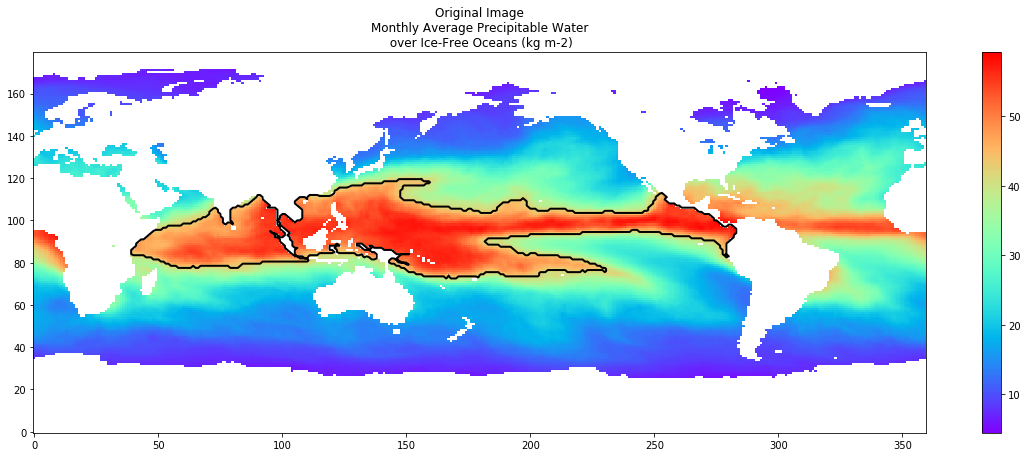

In [10]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import measure


# Find contours at a constant value of 2.0
contours = measure.find_contours(thresholded, 1.0)

# Display the image and plot all contours found

fig = plt.figure(figsize=[20,7])
ax = plt.subplot()
ax.set_title('Original Image\nMonthly Average Precipitable Water\n over Ice-Free Oceans (kg m-2)')
original=ax.imshow(pw, cmap='rainbow', interpolation='nearest', aspect='auto', origin='lower')
plt.colorbar(original, cmap='rainbow', ax=ax, orientation='vertical')
for n, contour in enumerate(contours):
    dists = distance.cdist(contour, contour, 'euclidean')
    if dists.max() > 200:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='black')
        print(dists.max())